In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [30]:
df1 = pd.read_csv('LifeExpectancyData.csv')
df=df1.dropna()
df.head()
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2736 entries, 0 to 2937
Data columns (total 9 columns):
ID                                 2736 non-null int64
Country                            2736 non-null object
Year                               2736 non-null int64
Status                             2736 non-null object
LifeExpectancy                     2736 non-null float64
Adult Mortality                    2736 non-null float64
BMI                                2736 non-null float64
Income composition of resources    2736 non-null float64
Schooling                          2736 non-null float64
dtypes: float64(5), int64(2), object(2)
memory usage: 213.8+ KB


Index(['ID', 'Country', 'Year', 'Status', 'LifeExpectancy', 'Adult Mortality',
       'BMI', 'Income composition of resources', 'Schooling'],
      dtype='object')

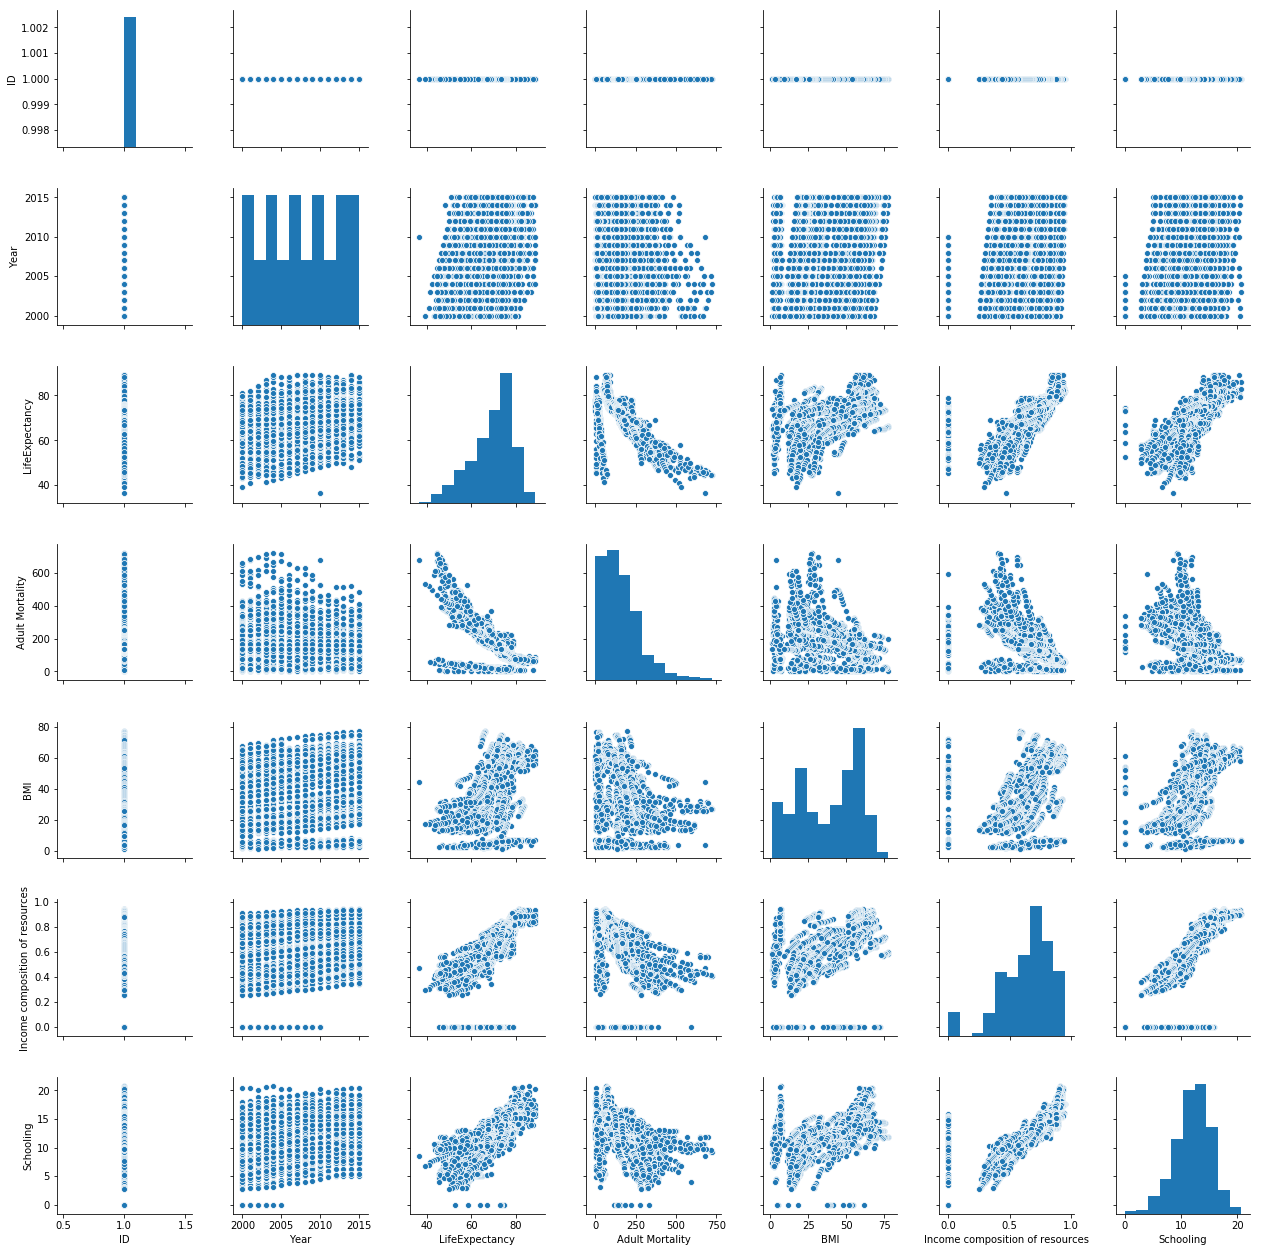

In [31]:
sns.pairplot(df)

In [32]:
df.corr()

,ID,Year,LifeExpectancy,Adult Mortality,BMI,Income composition of resources,Schooling
ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,NaN,1.000000,0.171609,-0.077084,0.101722,0.244376,0.218844
LifeExpectancy,NaN,0.171609,1.000000,-0.681017,0.563736,0.719335,0.749688
Adult Mortality,NaN,-0.077084,-0.681017,1.000000,-0.375359,-0.447458,-0.442386
BMI,NaN,0.101722,0.563736,-0.375359,1.000000,0.509299,0.558363
Income composition of resources,NaN,0.244376,0.719335,-0.447458,0.509299,1.000000,0.791651
Schooling,NaN,0.218844,0.749688,-0.442386,0.558363,0.791651,1.000000


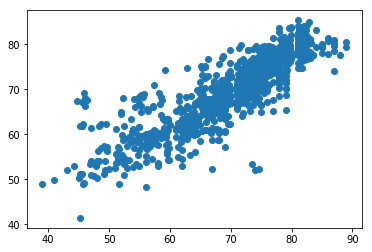

In [36]:
X = df[['Adult Mortality','BMI','Income composition of resources','Schooling']]
y= df['LifeExpectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
model=LinearRegression()
model.fit(X_train,y_train)

predictions = model.predict(X_test)
plt.scatter(y_test,predictions)

In [ ]:
#################################### REGRESSION WITH PYSPARK #############################################

In [13]:
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [14]:
spark=SparkSession.builder.appName('LifeExpectancy').getOrCreate()
data1=spark.read.csv('LifeExpectancyData.csv',inferSchema=True,header=True)
data=data1.dropna(thresh=5,subset=('Adult Mortality','BMI','Income composition of resources','Schooling','LifeExpectancy'))
data.show()
    data.printSchema()

+---+-----------+----+----------+--------------+---------------+----+-------------------------------+---------+
| ID|    Country|Year|    Status|LifeExpectancy|Adult Mortality| BMI|Income composition of resources|Schooling|
+---+-----------+----+----------+--------------+---------------+----+-------------------------------+---------+
|  1|Afghanistan|2015|Developing|          65.0|            263|19.1|                          0.479|     10.1|
|  1|Afghanistan|2014|Developing|          59.9|            271|18.6|                          0.476|     10.0|
|  1|Afghanistan|2013|Developing|          59.9|            268|18.1|                           0.47|      9.9|
|  1|Afghanistan|2012|Developing|          59.5|            272|17.6|                          0.463|      9.8|
|  1|Afghanistan|2011|Developing|          59.2|            275|17.2|                          0.454|      9.5|
|  1|Afghanistan|2010|Developing|          58.8|            279|16.7|                          0.448|   

In [15]:
featureassembler=VectorAssembler(inputCols=['Adult Mortality','BMI','Income composition of resources','Schooling'],outputCol="Independent Features")

In [16]:
output=featureassembler.transform(data)
output.show()

+---+-----------+----+----------+--------------+---------------+----+-------------------------------+---------+--------------------+
| ID|    Country|Year|    Status|LifeExpectancy|Adult Mortality| BMI|Income composition of resources|Schooling|Independent Features|
+---+-----------+----+----------+--------------+---------------+----+-------------------------------+---------+--------------------+
|  1|Afghanistan|2015|Developing|          65.0|            263|19.1|                          0.479|     10.1|[263.0,19.1,0.479...|
|  1|Afghanistan|2014|Developing|          59.9|            271|18.6|                          0.476|     10.0|[271.0,18.6,0.476...|
|  1|Afghanistan|2013|Developing|          59.9|            268|18.1|                           0.47|      9.9|[268.0,18.1,0.47,...|
|  1|Afghanistan|2012|Developing|          59.5|            272|17.6|                          0.463|      9.8|[272.0,17.6,0.463...|
|  1|Afghanistan|2011|Developing|          59.2|            275|17.2|

In [17]:
finalized_data=output.select("Independent Features","LifeExpectancy")
finalized_data.show()

+--------------------+--------------+
|Independent Features|LifeExpectancy|
+--------------------+--------------+
|[263.0,19.1,0.479...|          65.0|
|[271.0,18.6,0.476...|          59.9|
|[268.0,18.1,0.47,...|          59.9|
|[272.0,17.6,0.463...|          59.5|
|[275.0,17.2,0.454...|          59.2|
|[279.0,16.7,0.448...|          58.8|
|[281.0,16.2,0.434...|          58.6|
|[287.0,15.7,0.433...|          58.1|
|[295.0,15.2,0.415...|          57.5|
|[295.0,14.7,0.405...|          57.3|
|[291.0,14.2,0.396...|          57.3|
|[293.0,13.8,0.381...|          57.0|
|[295.0,13.4,0.373...|          56.7|
|[3.0,13.0,0.341,6.2]|          56.2|
|[316.0,12.6,0.34,...|          55.3|
|[321.0,12.2,0.338...|          54.8|
|[74.0,58.0,0.762,...|          77.8|
|[8.0,57.2,0.761,1...|          77.5|
|[84.0,56.5,0.759,...|          77.2|
|[86.0,55.8,0.752,...|          76.9|
+--------------------+--------------+
only showing top 20 rows



In [19]:
train_data,test_data=finalized_data.randomSplit([0.75,0.25])
regressor=LinearRegression(featuresCol="Independent Features",labelCol="LifeExpectancy")
regressor=regressor.fit(train_data)
regressor.coefficients

DenseVector([-0.0303, 0.0504, 9.713, 0.9877])

In [20]:
regressor.intercept

54.30813568940057

In [21]:
pred_results=regressor.evaluate(test_data)
pred_results.predictions.show()

+--------------------+--------------+-----------------+
|Independent Features|LifeExpectancy|       prediction|
+--------------------+--------------+-----------------+
|[1.0,52.6,0.713,1...|          75.3|75.70814476895163|
|[1.0,56.1,0.856,1...|          78.0|82.90354843037976|
|[2.0,15.4,0.563,1...|          66.0|70.86343149682182|
|[2.0,43.8,0.482,9.0]|          67.6|70.02723533667036|
|[3.0,13.0,0.341,6.2]|          56.2|64.30864532611494|
|[3.0,36.2,0.687,1...|          63.4|75.06181602405105|
|[4.0,23.3,0.456,8.3]|          52.8|67.98890283225019|
|[6.0,27.1,0.493,9.1]|          45.9| 69.2694258989168|
|[6.0,61.0,0.869,1...|          81.8|81.84126394695605|
|[6.0,64.6,0.895,1...|          82.2| 81.8802529434724|
|[6.0,65.4,0.874,1...|          82.4|83.19818942249036|
|[7.0,22.9,0.86,14.7]|          81.8|78.12315237278158|
|[7.0,57.0,0.931,1...|          84.0|83.29791938755267|
|[7.0,62.3,0.854,1...|          81.3|81.43448697485861|
|[8.0,58.5,0.867,1...|          79.4|81.04249631